# Business Analytics Class Community Detection

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import centrality
import itertools
from functools import reduce
import collections
import seaborn as sns 

In [2]:
# create graph
avg_mat = pd.read_csv('./HW2_who_talks_to_whom_avg.csv')
node_no_dict = {i:str(i+1) for i in list(range(81))}
avg_node_list = list()
for i in list(range(81)):
    for j in list(range(81)):
        if avg_mat.iloc[i, j] != 0:
            avg_node_list.append([node_no_dict[i], node_no_dict[j], avg_mat.iloc[i, j]])
G = nx.Graph()
G.add_weighted_edges_from(avg_node_list)

Rough idea of the network：

![BAcommunity.png](images/BAcommunity.png)

From the above graph, the whole class seems to split up to two communities with one more “talkative” (upper right group) and one more “silent” (lower left group). The two groups are connected quite tightly by several socially active students (No. 32, 68, 62, …) who are represented by big red dots - they are the ones who has talked to the most number of people (top 10% talkative).

In [3]:
# Find a partition that maximizes modularity
part = community.best_partition(G)
mod = community.modularity(part, G)
print("modularity: ", mod)


# dendrogram - partition at certain level
den = community.generate_dendrogram(G)
for level in range(len(den)):
   print("partition at level", level, " is ", community.partition_at_level(den, level), "\n")
print("The least partition gives 5 communities.")

modularity:  0.433408379868
partition at level 0  is  {'1': 0, '13': 1, '14': 2, '18': 3, '22': 3, '25': 4, '33': 0, '36': 1, '40': 1, '41': 3, '42': 2, '47': 5, '49': 2, '50': 2, '52': 1, '55': 2, '57': 6, '64': 1, '75': 5, '77': 1, '78': 7, '79': 5, '80': 6, '81': 1, '2': 4, '4': 5, '5': 8, '7': 4, '12': 8, '19': 4, '24': 4, '26': 4, '27': 4, '28': 4, '29': 9, '32': 10, '35': 11, '37': 10, '38': 11, '39': 4, '46': 9, '48': 4, '53': 4, '58': 4, '60': 4, '61': 10, '68': 10, '69': 8, '73': 4, '74': 11, '3': 3, '6': 2, '9': 7, '11': 3, '16': 3, '17': 5, '21': 3, '31': 12, '45': 3, '51': 10, '54': 5, '56': 10, '59': 3, '62': 3, '63': 7, '67': 6, '72': 7, '76': 12, '10': 4, '15': 5, '20': 5, '44': 5, '66': 5, '23': 10, '8': 0, '43': 9, '71': 1, '70': 9, '34': 9, '65': 5, '30': 10} 

partition at level 1  is  {'1': 0, '13': 1, '14': 0, '18': 1, '22': 1, '25': 2, '33': 0, '36': 1, '40': 1, '41': 1, '42': 0, '47': 3, '49': 0, '50': 0, '52': 1, '55': 0, '57': 3, '64': 1, '75': 3, '77': 1, '78'

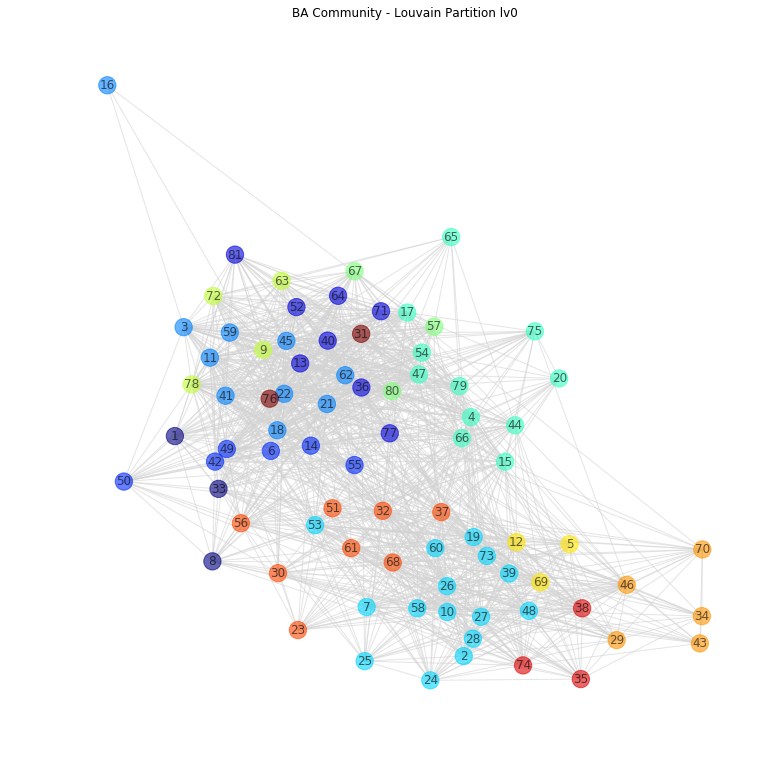

In [4]:
# 2. Plot using networkx where different community households have different colors.  
# for 1.(2)
# level 0
lv0_dict = community.partition_at_level(den, 0)
lv0_part_dict = dict()
plt.figure(figsize=(10, 10))
for i in list(set(lv0_dict.values())):
    lv0_part_dict[i] = list()
    for j in list(lv0_dict.keys()):
        if lv0_dict[j] == i:
            lv0_part_dict[i].append(j)
values = [lv0_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv0')
plt.show()

In [5]:
for i in list(lv0_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv0_part_dict[i])) + " nodes: " + str(lv0_part_dict[i]) + ". \n")

The 1th community contains 3 nodes: ['1', '33', '8']. 

The 2th community contains 8 nodes: ['13', '36', '40', '52', '64', '77', '81', '71']. 

The 3th community contains 6 nodes: ['14', '42', '49', '50', '55', '6']. 

The 4th community contains 10 nodes: ['18', '22', '41', '3', '11', '16', '21', '45', '59', '62']. 

The 5th community contains 15 nodes: ['25', '2', '7', '19', '24', '26', '27', '28', '39', '48', '53', '58', '60', '73', '10']. 

The 6th community contains 11 nodes: ['47', '75', '79', '4', '17', '54', '15', '20', '44', '66', '65']. 

The 7th community contains 3 nodes: ['57', '80', '67']. 

The 8th community contains 4 nodes: ['78', '9', '63', '72']. 

The 9th community contains 3 nodes: ['5', '12', '69']. 

The 10th community contains 5 nodes: ['29', '46', '43', '70', '34']. 

The 11th community contains 8 nodes: ['32', '37', '61', '68', '51', '56', '23', '30']. 

The 12th community contains 3 nodes: ['35', '38', '74']. 

The 13th community contains 2 nodes: ['31', '76']

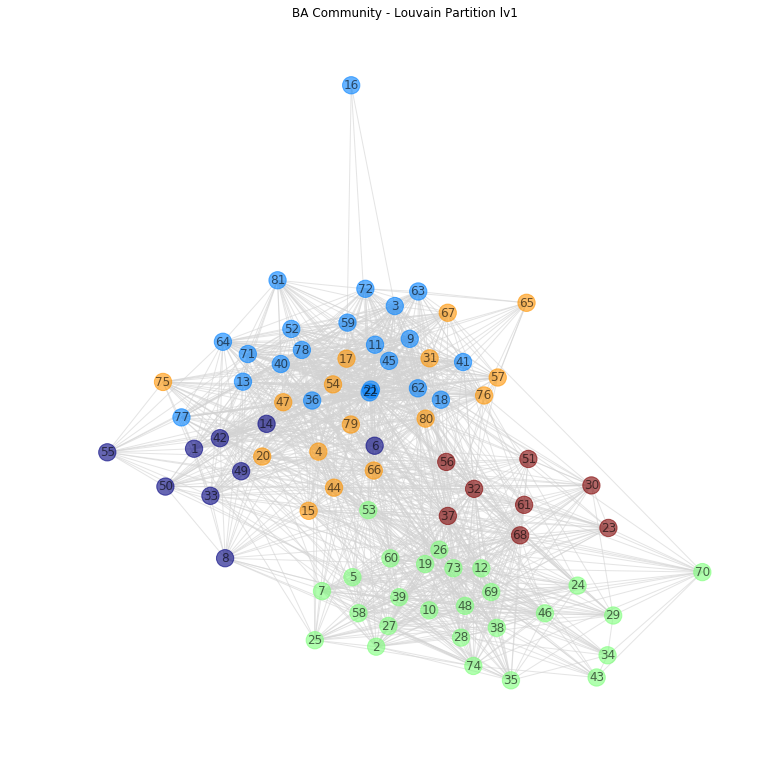

In [6]:
# level 1
lv1_dict = community.partition_at_level(den, 1)
lv1_part_dict = dict()
plt.figure(figsize=(10, 10))

for i in list(set(lv1_dict.values())):
    lv1_part_dict[i] = list()
    for j in list(lv1_dict.keys()):
        if lv1_dict[j] == i:
            lv1_part_dict[i].append(j)
values = [lv1_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv1')
plt.show()

In [7]:
for i in list(lv1_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv1_part_dict[i])) + " nodes: " + str(lv1_part_dict[i]) + ". \n")

The 1th community contains 9 nodes: ['1', '14', '33', '42', '49', '50', '55', '6', '8']. 

The 2th community contains 22 nodes: ['13', '18', '22', '36', '40', '41', '52', '64', '77', '78', '81', '3', '9', '11', '16', '21', '45', '59', '62', '63', '72', '71']. 

The 3th community contains 26 nodes: ['25', '2', '5', '7', '12', '19', '24', '26', '27', '28', '29', '35', '38', '39', '46', '48', '53', '58', '60', '69', '73', '74', '10', '43', '70', '34']. 

The 4th community contains 16 nodes: ['47', '57', '75', '79', '80', '4', '17', '31', '54', '67', '76', '15', '20', '44', '66', '65']. 

The 5th community contains 8 nodes: ['32', '37', '61', '68', '51', '56', '23', '30']. 

